In [16]:
# Import necessary packages
import pandas as pd
import statsmodels.api as sm
import os
import numpy as np

# Define file paths and load data into pandas dataframes
data_folder = '../data' 

cast_details_path = os.path.join(data_folder, 'tv_show_cast_details.csv')
image_race_gender_path = os.path.join(data_folder, 'tv_cast_image_race_gender.csv')
show_to_cast_path = os.path.join(data_folder, 'tv_show_season_to_cast.csv')
processed_gender_path = os.path.join(data_folder, 'tv_show_cast_processed_gender.csv')

df_cast_details = pd.read_csv(cast_details_path)[['id', 'gender']]
df_image_race_gender = pd.read_csv(image_race_gender_path)[['id', 'profile_race', 'profile_gender']]
df_show_cast = pd.read_csv(show_to_cast_path)[['cast_id', 'episode_count']]
df_processed_gender = pd.read_csv(processed_gender_path)[['id', 'gender']]

# Map gender from numerical to categorical in df_cast_details and merge it with df_image_race_gender
gender_map = {1: 'Female', 2: 'Male', 0: 'Other'}
df_cast_details['gender'] = df_cast_details['gender'].map(gender_map)
df = pd.merge(df_cast_details, df_image_race_gender, on='id', how='left')

# Merge with df_show_cast and df_processed_gender
df = pd.merge(df, df_show_cast, left_on='id', right_on='cast_id', how='left')
df = pd.merge(df, df_processed_gender, on='id', how='left', suffixes=('', '_processed'))

# Fill missing episode counts with 0 and drop rows where gender or race is missing
df['episode_count'].fillna(0, inplace=True)
df.dropna(subset=['gender', 'profile_race'], inplace=True)

# Perform OLS regression with episode_count as dependent variable and gender & race as independent variables
for col in ['gender', 'profile_gender', 'gender_processed', 'profile_race']:
    df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)

Y = df['episode_count']
X = df[df.columns[df.columns.str.contains('gender|profile_race')]]
X = X.select_dtypes(include=[np.number]) # Ensure only numeric columns remain

X = sm.add_constant(X)  # adding a constant

# Perform OLS regression
model = sm.OLS(Y, X).fit()

# Print out the statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          episode_count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 24 Jul 2023   Prob (F-statistic):                nan
Time:                        15:45:20   Log-Likelihood:            -1.0533e+06
No. Observations:              191304   AIC:                         2.107e+06
Df Residuals:                  191303   BIC:                         2.107e+06
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9029      0.136     50.697      0.0

In [17]:
import pandas as pd

# Assume df is your DataFrame and it has columns 'gender' and 'profile_race'

# Gender breakdown
gender_counts = df['gender'].value_counts()

# Calculate percentages
gender_percentages = gender_counts / gender_counts.sum() * 100

# Display gender breakdown
print("Gender Breakdown:")
print(gender_percentages)

# For each racial group, calculate and display gender breakdown
racial_groups = df['profile_race'].unique()

for race in racial_groups:
    print("\nGender Breakdown for Race: ", race)
    race_df = df[df['profile_race'] == race]
    race_gender_counts = race_df['gender'].value_counts()
    race_gender_percentages = race_gender_counts / race_gender_counts.sum() * 100
    print(race_gender_percentages)


Gender Breakdown:
gender
Male      61.472839
Female    34.920859
Other      3.606302
Name: count, dtype: float64

Gender Breakdown for Race:  white
gender
Male      59.346266
Female    37.411469
Other      3.242265
Name: count, dtype: float64

Gender Breakdown for Race:  latino hispanic
gender
Male      61.942121
Female    33.522107
Other      4.535772
Name: count, dtype: float64

Gender Breakdown for Race:  middle eastern
gender
Male      90.643761
Female     5.560174
Other      3.796065
Name: count, dtype: float64

Gender Breakdown for Race:  asian
gender
Male      50.947108
Female    44.368352
Other      4.684540
Name: count, dtype: float64

Gender Breakdown for Race:  black
gender
Male      66.392139
Female    29.495626
Other      4.112234
Name: count, dtype: float64

Gender Breakdown for Race:  indian
gender
Male      67.522124
Female    26.017699
Other      6.460177
Name: count, dtype: float64


In [21]:
# Define the races
races = ['asian', 'white', 'latino hispanic', 'middle eastern', 'black', 'indian']

# Create new DataFrame to hold the percentages
percentages_df = pd.DataFrame()

# For each racial group, calculate the gender percentages and add to the DataFrame
for race in races:
    race_df = df[df['profile_race'] == race]
    race_gender_counts = race_df['gender'].value_counts()
    race_gender_percentages = race_gender_counts / race_gender_counts.sum() * 100
    percentages_df['male_%_of_' + race] = [race_gender_percentages.get('Male', 0)]
    percentages_df['female_%_of_' + race] = [race_gender_percentages.get('Female', 0)]

# Display the new DataFrame
print(percentages_df)


KeyError: 'gender'

In [22]:
# Define the races
races = ['asian', 'white', 'latino hispanic', 'middle eastern', 'black', 'indian']

# Create new DataFrame to hold the percentages
percentages_df = pd.DataFrame()

# For each racial group, calculate the gender percentages and add to the DataFrame
for race in races:
    race_df = df[df['profile_race'] == race]
    race_gender_counts = race_df['gender'].value_counts()
    race_gender_percentages = race_gender_counts / race_gender_counts.sum() * 100
    percentages_df['male_%_of_' + race] = [race_gender_percentages.get('Male', 0)]
    percentages_df['female_%_of_' + race] = [race_gender_percentages.get('Female', 0)]

# Display the new DataFrame
print(percentages_df)


KeyError: 'gender'

In [24]:
# Define the races
races = ['asian', 'white', 'latino hispanic', 'middle eastern', 'black', 'indian']

# Create new DataFrame to hold the percentages
percentages_df = pd.DataFrame()

# For each racial group, calculate the gender percentages and add to the DataFrame
for race in races:
    race_df = df[df['profile_race'] == race]
    race_gender_counts = race_df['detail_gender'].value_counts()
    race_gender_percentages = race_gender_counts / race_gender_counts.sum() * 100
    percentages_df['male_%_of_' + race] = [race_gender_percentages.get('Male', 0)]
    percentages_df['female_%_of_' + race] = [race_gender_percentages.get('Female', 0)]

# Display the new DataFrame
print(percentages_df)


   male_%_of_asian  female_%_of_asian  male_%_of_white  female_%_of_white  \
0                0                  0                0                  0   

   male_%_of_latino hispanic  female_%_of_latino hispanic  \
0                          0                            0   

   male_%_of_middle eastern  female_%_of_middle eastern  male_%_of_black  \
0                         0                           0                0   

   female_%_of_black  male_%_of_indian  female_%_of_indian  
0                  0                 0                   0  


In [25]:
# Define the races and genders
races = ['asian', 'white', 'latino hispanic', 'middle eastern', 'black', 'indian']
genders = ['Male', 'Female']

# Create new DataFrame to hold the percentages
percentages_df = pd.DataFrame()

# For each racial group and gender, calculate the percentages and add to the DataFrame
for race in races:
    for gender in genders:
        race_gender_df = df[(df['profile_race'] == race) & (df['detail_gender'] == gender)]
        total_race_df = df[df['profile_race'] == race]
        
        percentage = len(race_gender_df) / len(total_race_df) * 100 if len(total_race_df) > 0 else 0
        percentages_df[gender.lower() + '_%_of_' + race] = [percentage]

# Display the new DataFrame
print(percentages_df)


   male_%_of_asian  female_%_of_asian  male_%_of_white  female_%_of_white  \
0              0.0                0.0              0.0                0.0   

   male_%_of_latino hispanic  female_%_of_latino hispanic  \
0                        0.0                          0.0   

   male_%_of_middle eastern  female_%_of_middle eastern  male_%_of_black  \
0                       0.0                         0.0              0.0   

   female_%_of_black  male_%_of_indian  female_%_of_indian  
0                0.0               0.0                 0.0  


In [26]:
# Define the races and genders
races = ['asian', 'white', 'latino hispanic', 'middle eastern', 'black', 'indian']
genders = ['Male', 'Female']

# Create new DataFrame to hold the percentages
percentages_df = pd.DataFrame()

# For each racial group and gender, calculate the percentages and add to the DataFrame
for race in races:
    for gender in genders:
        race_gender_df = df[(df['profile_race'] == race) & (df['detail_gender'] == gender)]
        total_race_df = df[df['profile_race'] == race]
        
        print(f"For race: {race} and gender: {gender}")
        print(f"Number of rows in race_gender_df: {len(race_gender_df)}")
        print(f"Number of rows in total_race_df: {len(total_race_df)}")
        
        percentage = len(race_gender_df) / len(total_race_df) * 100 if len(total_race_df) > 0 else 0
        percentages_df[gender.lower() + '_%_of_' + race] = [percentage]

# Display the new DataFrame
print(percentages_df)


For race: asian and gender: Male
Number of rows in race_gender_df: 0
Number of rows in total_race_df: 4
For race: asian and gender: Female
Number of rows in race_gender_df: 0
Number of rows in total_race_df: 4
For race: white and gender: Male
Number of rows in race_gender_df: 0
Number of rows in total_race_df: 4
For race: white and gender: Female
Number of rows in race_gender_df: 0
Number of rows in total_race_df: 4
For race: latino hispanic and gender: Male
Number of rows in race_gender_df: 0
Number of rows in total_race_df: 4
For race: latino hispanic and gender: Female
Number of rows in race_gender_df: 0
Number of rows in total_race_df: 4
For race: middle eastern and gender: Male
Number of rows in race_gender_df: 0
Number of rows in total_race_df: 4
For race: middle eastern and gender: Female
Number of rows in race_gender_df: 0
Number of rows in total_race_df: 4
For race: black and gender: Male
Number of rows in race_gender_df: 0
Number of rows in total_race_df: 4
For race: black an

In [27]:
# Aggregate total episode count for each race
episode_count_by_race = df.groupby('profile_race')['total_episode_count'].sum()

# Display the result
print(episode_count_by_race)


profile_race
asian               178533
black               258982
indian               19799
latino hispanic     346790
middle eastern      173658
white              2537031
Name: total_episode_count, dtype: int64


In [28]:
# Aggregate total episode count for each race and gender
episode_count_by_race_gender = df.groupby(['profile_race', 'detail_gender'])['total_episode_count'].sum()

# Display the result
print(episode_count_by_race_gender)


profile_race     detail_gender
asian            0                  10442
                 1                  67764
                 2                  99987
                 3                    340
black            0                   5340
                 1                  71387
                 2                 182220
                 3                     35
indian           0                    457
                 1                   5866
                 2                  13476
latino hispanic  0                  11019
                 1                  92178
                 2                 243032
                 3                    561
middle eastern   0                   2118
                 1                   6485
                 2                 164934
                 3                    121
white            0                  65504
                 1                 902002
                 2                1568395
                 3                   1130
Nam

In [29]:
# Convert to DataFrame with one column per gender
episode_count_by_race_gender_df = episode_count_by_race_gender.unstack('detail_gender')

# Display the result
print(episode_count_by_race_gender_df)


detail_gender          0         1          2       3
profile_race                                         
asian            10442.0   67764.0    99987.0   340.0
black             5340.0   71387.0   182220.0    35.0
indian             457.0    5866.0    13476.0     NaN
latino hispanic  11019.0   92178.0   243032.0   561.0
middle eastern    2118.0    6485.0   164934.0   121.0
white            65504.0  902002.0  1568395.0  1130.0


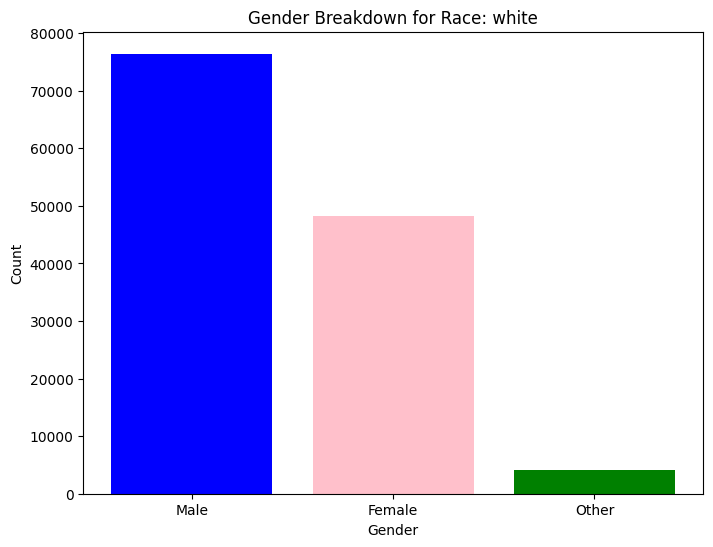

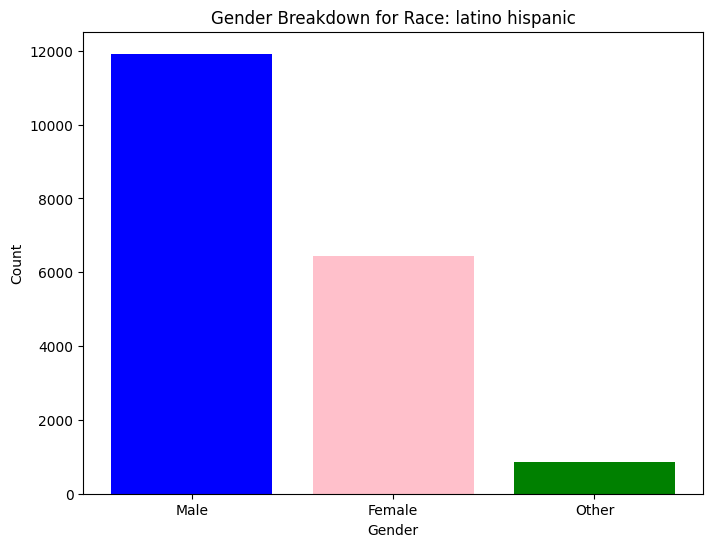

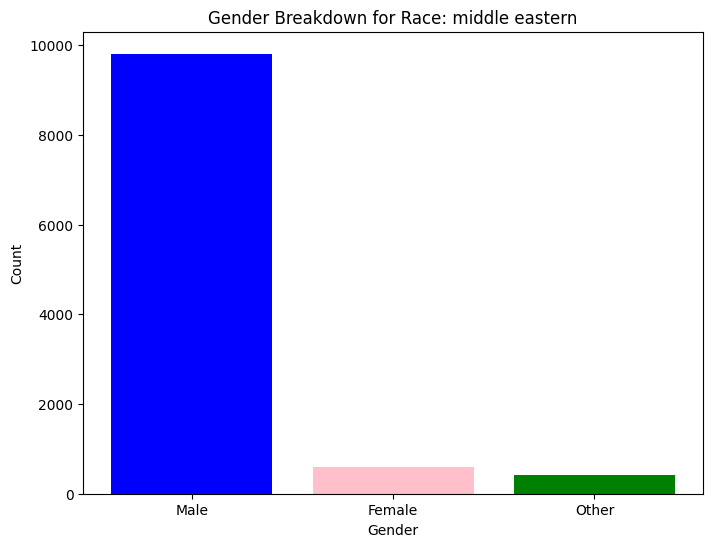

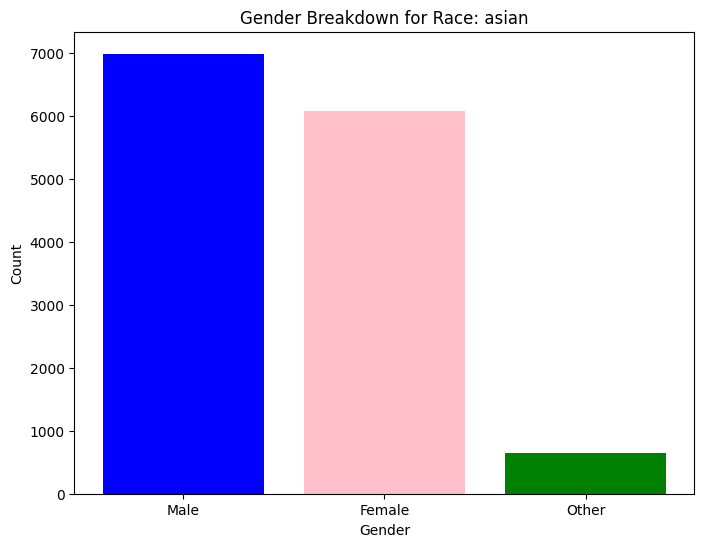

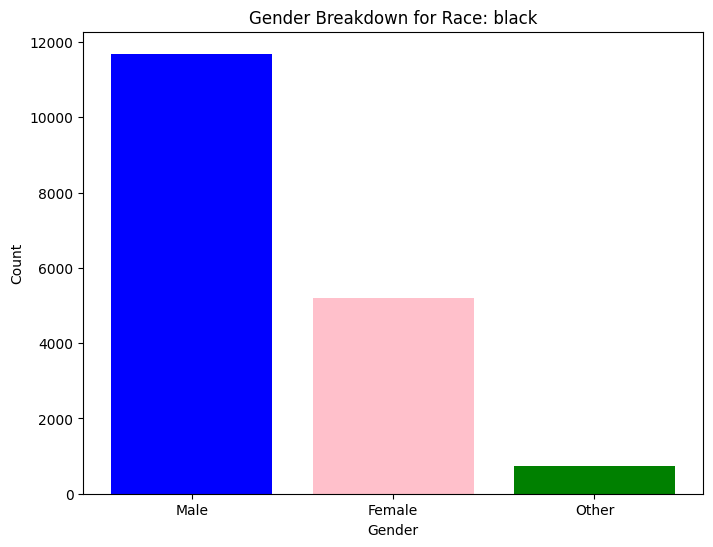

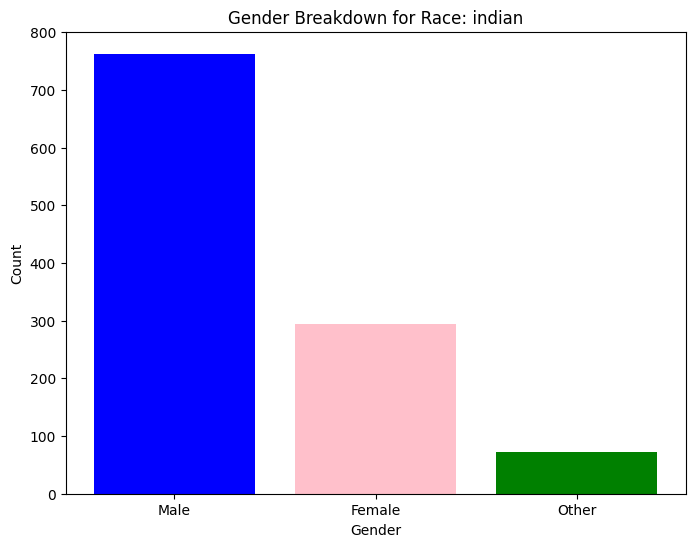

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume df is your DataFrame and it has columns 'gender' and 'profile_race'

# For each racial group, calculate and display gender breakdown
racial_groups = df['profile_race'].unique()

for race in racial_groups:
    # Select the DataFrame for this race
    race_df = df[df['profile_race'] == race]
    
    # Count the genders
    race_gender_counts = race_df['gender'].value_counts()
    
    # Create a bar plot for this racial group
    plt.figure(figsize=(8, 6))
    plt.bar(race_gender_counts.index, race_gender_counts.values, color=['blue', 'pink', 'green'])
    
    # Add title and labels
    plt.title(f"Gender Breakdown for Race: {race}")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    
    # Show the plot
    plt.show()


In [1]:
import sqlite3
import pandas as pd
import os

# Define your data folder and database path
data_folder = '../data' 
db_path = os.path.join(data_folder, 'tv_data.db')

# Create a connection to the SQLite database
conn = sqlite3.connect(db_path)

# Get the list of all tables
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
table_list = tables['name'].tolist()

# Loop through all tables, fetch data and print out information
for table in table_list:
    query = f"SELECT * FROM {table};"
    df = pd.read_sql_query(query, conn)
    print(f"Table: {table}")
    print(f"Size: {df.shape}")
    print(f"Columns: {', '.join(df.columns.tolist())}")
    print("-------------------")

# Close the connection
conn.close()


Table: cast_details
Size: (157648, 7)
Columns: id, imdb_id, name, gender, birthday, deathday, profile_path
-------------------
Table: image_race_gender
Size: (157647, 5)
Columns: id, name, profile_path, profile_race, profile_gender
-------------------
Table: top_shows_yearly
Size: (3099, 8)
Columns: year, name, id, genres, origin_country, popularity, vote_average, vote_count
-------------------
Table: season_to_cast
Size: (709087, 8)
Columns: show_id, season_number, cast_id, cast_name, episode_count, known_for_department, season_air_date, season_vote_average
-------------------


In [13]:
import sqlite3
import pandas as pd
import os
import statsmodels.api as sm
import numpy as np

# Define your data folder and database path
data_folder = '../data' 
db_path = os.path.join(data_folder, 'tv_data.db')

# Create a connection to the SQLite database
conn = sqlite3.connect(db_path)

# SQL query to join the tables and retrieve necessary data
query = '''
    SELECT cd.gender as detail_gender, irg.profile_race, sum(stc.episode_count) as total_episode_count
    FROM cast_details cd
    JOIN image_race_gender irg ON cd.id = irg.id
    JOIN season_to_cast stc ON stc.cast_id = cd.id
    GROUP BY detail_gender, profile_race
'''

# Execute the query and store the result in a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Define dependent variable
Y = pd.to_numeric(df['total_episode_count'], errors='coerce')

# Define independent variables
X = df.drop('total_episode_count', axis=1)

# Convert the independent variables to dummies
X = pd.get_dummies(X, drop_first=True)

# Convert all columns in X to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Add a constant to the independent variables if there is no constant
if not np.any(X.columns.str.contains('const')):
    X = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(Y, X, missing='drop').fit()  # dropping rows with NaN values

# Print the model summary
print(model.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [15]:
import sqlite3
import pandas as pd
import os
import statsmodels.api as sm
import numpy as np

# Define your data folder and database path
data_folder = '../data' 
db_path = os.path.join(data_folder, 'tv_data.db')

# Create a connection to the SQLite database
conn = sqlite3.connect(db_path)

# SQL query to join the tables and retrieve necessary data
query = '''
    SELECT cd.gender as detail_gender, irg.profile_race, sum(stc.episode_count) as total_episode_count
    FROM cast_details cd
    JOIN image_race_gender irg ON cd.id = irg.id
    JOIN season_to_cast stc ON stc.cast_id = cd.id
    GROUP BY detail_gender, profile_race
'''

# Execute the query and store the result in a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the DataFrame for inspection
print(df)

# Close the connection
conn.close()

# Define dependent variable
Y = pd.to_numeric(df['total_episode_count'], errors='coerce')

# Check if 'total_episode_count' is numeric now
print(Y.dtypes)

# Define independent variables
X = df.drop('total_episode_count', axis=1)

# Convert the independent variables to dummies
X = pd.get_dummies(X, drop_first=True, dummy_na=False)  # do not create dummy variable for NaN

# Drop rows with any NaN values in the dataframe X
X = X.dropna()

# Perform the same operation for the dependent variable Y
Y = Y.loc[X.index]

# Add a constant to the independent variables if there is no constant
if not np.any(X.columns.str.contains('const')):
    X = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(Y, X).fit()

# Print the model summary
print(model.summary())


    detail_gender     profile_race  total_episode_count
0               0             None              1685845
1               0            asian                10442
2               0            black                 5340
3               0           indian                  457
4               0  latino hispanic                11019
5               0   middle eastern                 2118
6               0            white                65504
7               1             None               285706
8               1            asian                67764
9               1            black                71387
10              1           indian                 5866
11              1  latino hispanic                92178
12              1   middle eastern                 6485
13              1            white               902002
14              2             None               741273
15              2            asian                99987
16              2            black              

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [16]:
import sqlite3
import pandas as pd
import os
import statsmodels.api as sm
import numpy as np

# Define your data folder and database path
data_folder = '../data' 
db_path = os.path.join(data_folder, 'tv_data.db')

# Create a connection to the SQLite database
conn = sqlite3.connect(db_path)

# SQL query to join the tables and retrieve necessary data
query = '''
    SELECT cd.gender as detail_gender, irg.profile_race, sum(stc.episode_count) as total_episode_count
    FROM cast_details cd
    JOIN image_race_gender irg ON cd.id = irg.id
    JOIN season_to_cast stc ON stc.cast_id = cd.id
    GROUP BY detail_gender, profile_race
'''

# Execute the query and store the result in a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print the DataFrame for inspection
print(df)

# Close the connection
conn.close()

# Define dependent variable
Y = pd.to_numeric(df['total_episode_count'], errors='coerce')

# Check if 'total_episode_count' is numeric now
print(Y.dtypes)

# Define independent variables
X = df.drop('total_episode_count', axis=1)

# Convert the independent variables to dummies
X = pd.get_dummies(X, drop_first=True, dummy_na=False)  # do not create dummy variable for NaN

# Drop rows with any NaN values in the dataframe X
X = X.dropna()

# Perform the same operation for the dependent variable Y
Y = Y.loc[X.index]

# Ensure Y does not contain NaN values
Y = Y.dropna()

# Print the types of the variables for inspection
print(X.dtypes)
print(Y.dtypes)

# Add a constant to the independent variables if there is no constant
if not np.any(X.columns.str.contains('const')):
    X = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(Y.astype(float), X.astype(float)).fit() # Ensure float type

# Print the model summary
print(model.summary())


    detail_gender     profile_race  total_episode_count
0               0             None              1685845
1               0            asian                10442
2               0            black                 5340
3               0           indian                  457
4               0  latino hispanic                11019
5               0   middle eastern                 2118
6               0            white                65504
7               1             None               285706
8               1            asian                67764
9               1            black                71387
10              1           indian                 5866
11              1  latino hispanic                92178
12              1   middle eastern                 6485
13              1            white               902002
14              2             None               741273
15              2            asian                99987
16              2            black              

In [18]:
import sqlite3
import pandas as pd
import os
import statsmodels.api as sm
import numpy as np

# Define your data folder and database path
data_folder = '../data' 
db_path = os.path.join(data_folder, 'tv_data.db')

# Create a connection to the SQLite database
conn = sqlite3.connect(db_path)

# SQL query to join the tables and retrieve necessary data
query = '''
    SELECT cd.gender as detail_gender, irg.profile_race, sum(stc.episode_count) as total_episode_count
    FROM cast_details cd
    JOIN image_race_gender irg ON cd.id = irg.id
    JOIN season_to_cast stc ON stc.cast_id = cd.id
    GROUP BY detail_gender, profile_race
'''

# Execute the query and store the result in a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Convert columns to string before concatenating
df['detail_gender'] = df['detail_gender'].astype(str)
df['profile_race'] = df['profile_race'].astype(str)

# Create a new column 'race_gender' combining 'detail_gender' and 'profile_race'
df['race_gender'] = df['detail_gender'] + '_' + df['profile_race']

# Define dependent variable
Y = pd.to_numeric(df['total_episode_count'], errors='coerce')

# Define independent variables
X = df.drop(['total_episode_count', 'detail_gender', 'profile_race'], axis=1) # remove old independent variables

# Convert the independent variables to dummies
X = pd.get_dummies(X, drop_first=True, dummy_na=False)  # do not create dummy variable for NaN

# Drop rows with any NaN values in the dataframe X
X = X.dropna()

# Perform the same operation for the dependent variable Y
Y = Y.loc[X.index]

# Ensure Y does not contain NaN values
Y = Y.dropna()

# Print the types of the variables for inspection
print(X.dtypes)
print(Y.dtypes)

# Add a constant to the independent variables if there is no constant
if not np.any(X.columns.str.contains('const')):
    X = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(Y.astype(float), X.astype(float)).fit() # Ensure float type

# Print the model summary
print(model.summary())


race_gender_0_asian              bool
race_gender_0_black              bool
race_gender_0_indian             bool
race_gender_0_latino hispanic    bool
race_gender_0_middle eastern     bool
race_gender_0_white              bool
race_gender_1_None               bool
race_gender_1_asian              bool
race_gender_1_black              bool
race_gender_1_indian             bool
race_gender_1_latino hispanic    bool
race_gender_1_middle eastern     bool
race_gender_1_white              bool
race_gender_2_None               bool
race_gender_2_asian              bool
race_gender_2_black              bool
race_gender_2_indian             bool
race_gender_2_latino hispanic    bool
race_gender_2_middle eastern     bool
race_gender_2_white              bool
race_gender_3_None               bool
race_gender_3_asian              bool
race_gender_3_black              bool
race_gender_3_latino hispanic    bool
race_gender_3_middle eastern     bool
race_gender_3_white              bool
dtype: objec

c:\Users\cjong\Projects\python\scrotten_movies\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\cjong\Projects\python\scrotten_movies\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\cjong\Projects\python\scrotten_movies\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


In [20]:
import sqlite3
import pandas as pd
import os
import statsmodels.api as sm
import numpy as np

# Define your data folder and database path
data_folder = '../data' 
db_path = os.path.join(data_folder, 'tv_data.db')

# Create a connection to the SQLite database
conn = sqlite3.connect(db_path)

# SQL query to join the tables and retrieve necessary data
query = '''
    SELECT cd.gender as detail_gender, irg.profile_race, sum(stc.episode_count) as total_episode_count
    FROM cast_details cd
    JOIN image_race_gender irg ON cd.id = irg.id
    JOIN season_to_cast stc ON stc.cast_id = cd.id
    GROUP BY detail_gender, profile_race
'''

# Execute the query and store the result in a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Check if there are any null values in profile_race
print(df['profile_race'].isnull().any())

# Drop rows where profile_race is null
df = df.dropna(subset=['profile_race'])

# Create a new column 'race_gender' combining 'detail_gender' and 'profile_race'
df['race_gender'] = df['detail_gender'].astype(str) + '_' + df['profile_race'].astype(str)

# Calculate the count of each 'race_gender'
gender_race_counts = df['race_gender'].value_counts()

# Calculate the total count for each race
total_race_counts = df['profile_race'].value_counts()

# Calculate the proportion of each gender within each race
df['gender_race_proportion'] = 0
for index, value in gender_race_counts.items():
    race = index.split('_')[1]
    df.loc[df['race_gender'] == index, 'gender_race_proportion'] = value / total_race_counts[race]

# Define dependent variable
Y = pd.to_numeric(df['total_episode_count'], errors='coerce')

# Define independent variables
X = df[['gender_race_proportion']]

# Add a constant to the independent variables
X = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(Y, X, missing='drop').fit()

# Print the model summary
print(model.summary())


True
                             OLS Regression Results                            
Dep. Variable:     total_episode_count   R-squared:                       0.026
Model:                             OLS   Adj. R-squared:                 -0.021
Method:                  Least Squares   F-statistic:                    0.5502
Date:                 Thu, 27 Jul 2023   Prob (F-statistic):              0.466
Time:                         23:08:33   Log-Likelihood:                -326.24
No. Observations:                   23   AIC:                             656.5
Df Residuals:                       21   BIC:                             658.7
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const        